# High speed gear dataset

Radial vibration measurements taken on 3MW wind turbine pinion gear. For the fault case (case 1) initial vibration readings showed high vibration levels, the machine was stopped after one week and fault on pinion gear found as shown in image below. Two other vibration readings (case 2 and 3) are given from pinion gears of different wind turbines of the same model with no known faults.
![pinonGear.jpg](pinonGear.jpg)

http://data-acoustics.com/?p=280

* Sample rate: 97656 Hz
* Record length: 6 seconds
* Unit: g
* Axis measured: Radial
* Sensor type: Accelerometer

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

Función para cargar datos del archivo .mat:

In [2]:
def setup_file(filename):
    data = scipy.io.loadmat(filename)
    teeth = data["teeth"].item(0)
    sample_rate = data["sr"].item(0)
    accelerometer_gs = data["gs"][:,0]
    tach = data["tach"]
    periods_per_revolution = data["ppr"].item(0)

    gear_rpm = 1800
    gear_expected_hz = gear_rpm/60
    gear_real_hz = tach.size/(8*(tach[-1]-tach[0]))
    teeth_hz = gear_real_hz * 32

    print("teeth:", teeth)
    print("sample_rate:", sample_rate)
    print("gear_hz:", gear_real_hz)
    print("teeth_hz:", teeth_hz)
    
    
    return {"sample_rate": sample_rate, 
            "accelerometer_gs": accelerometer_gs,
            "gear_hz": gear_real_hz,
            "teeth_hz": teeth_hz}


Función para dibujar FFT de datos de archivo:

In [3]:
def show_file(file_path):
    data = setup_file(file_path)

    accelerometer_gs = data['accelerometer_gs']
    sample_rate = data['sample_rate']
    gear_hz = data['gear_hz']
    teeth_hz = data['teeth_hz']

    sample_num = accelerometer_gs.size
    time = sample_num/sample_rate
    t = np.linspace(0, time, sample_num)

    acceleration_m_s2 = (accelerometer_gs-1) * 9.8
    # mean_gs = accelerometer_gs.mean()
    # acceleration_m_s2 = (accelerometer_gs-mean_gs) * 9.8
    velocity = np.cumsum(acceleration_m_s2)
    location = np.cumsum(velocity)

    fft_input = accelerometer_gs

    samples = fft_input.size
    #samples = 10000

    t = np.arange(samples)/sample_rate
    fft_input = fft_input[:samples]

    t_freq = np.fft.rfftfreq(samples, 1/sample_rate)

    fft = np.fft.rfft(fft_input)

    # plt.figure()
    # plt.plot(t,fft_input)

    plt.figure()
    # plt.semilogy()
    plt.plot(t_freq, np.absolute(fft))
    #plt.plot(t_freq, np.angle(fft))
    plt.axvline(gear_hz, color='r', linestyle=(0,(2, 5)), linewidth=1, label='Gear rotation frequency')
    plt.axvline(teeth_hz, color='g', linestyle=(0,(2, 5)), linewidth=1, label='Teeth contact frequency')
    plt.axvline(teeth_hz * 2, color='b', linestyle=(0,(2, 5)), linewidth=1, label='Teeth contact 1st harmonic')
    plt.axvline(teeth_hz * 3, color='c', linestyle=(0,(2, 5)), linewidth=1, label='Teeth contact 2nd harmonic')
    

    plt.xlim(-1000, 15000)
    plt.ylim(0, 5e4)
    plt.legend()


Muestras de turbina 1:

teeth: 32
sample_rate: 97656
gear_hz: [ 29.3175749]
teeth_hz: [ 938.16239683]


<IPython.core.display.Javascript object>


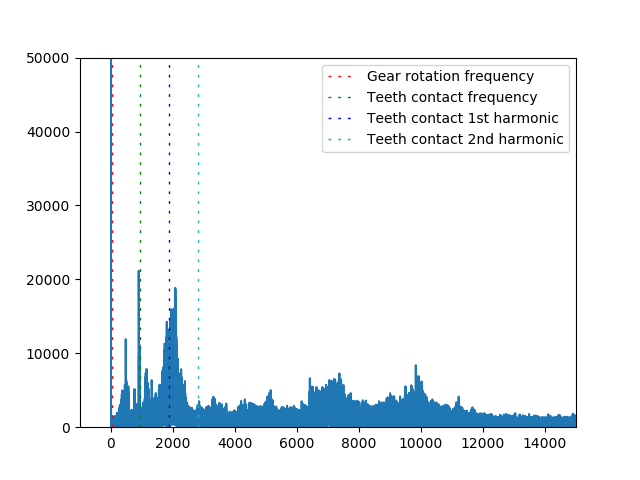

teeth: 32
sample_rate: 97656
gear_hz: [ 29.34307927]
teeth_hz: [ 938.9785366]


<IPython.core.display.Javascript object>


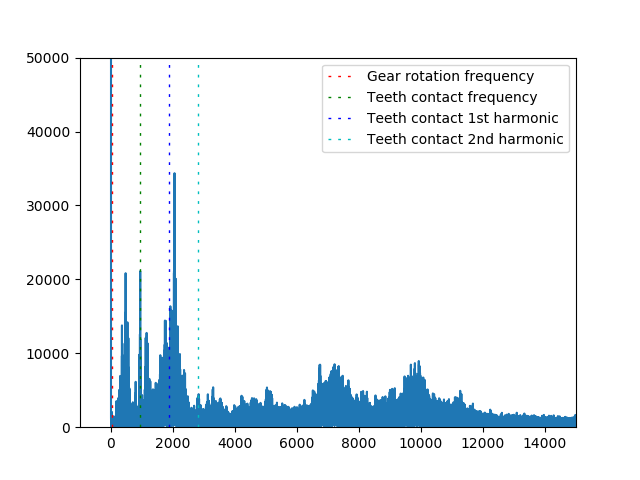

teeth: 32
sample_rate: 97656
gear_hz: [ 29.21025295]
teeth_hz: [ 934.72809438]


<IPython.core.display.Javascript object>


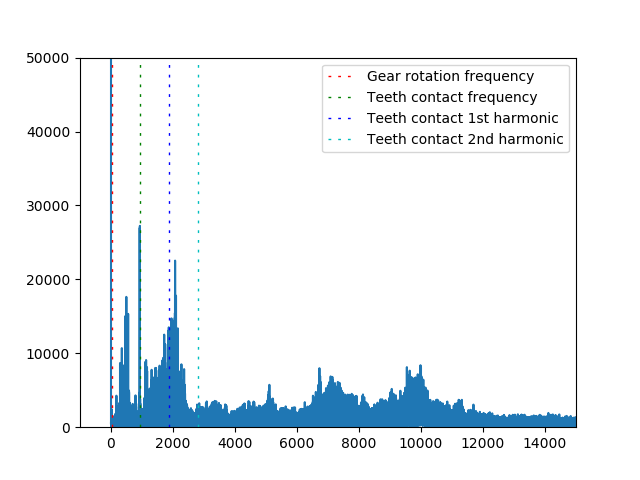

In [4]:
show_file("hs_gear_1_fault/case1_1.mat")
show_file("hs_gear_1_fault/case1_2.mat")
show_file("hs_gear_1_fault/case1_3.mat")


Muestras de turbina 2:

teeth: 32
sample_rate: 97656
gear_hz: [ 29.38400869]
teeth_hz: [ 940.28827822]


<IPython.core.display.Javascript object>


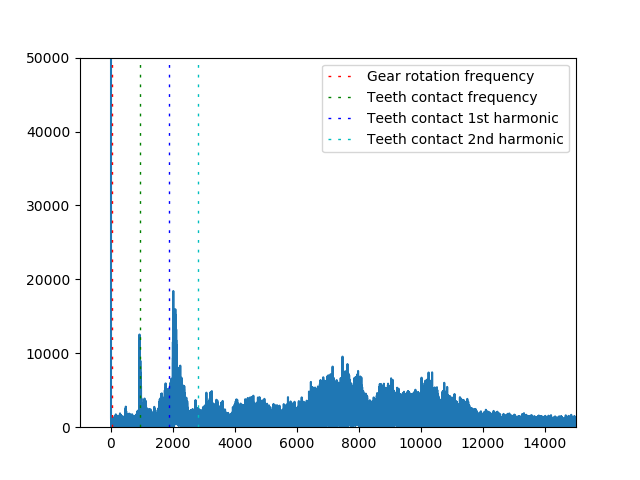

teeth: 32
sample_rate: 97656
gear_hz: [ 29.00318926]
teeth_hz: [ 928.10205648]


<IPython.core.display.Javascript object>


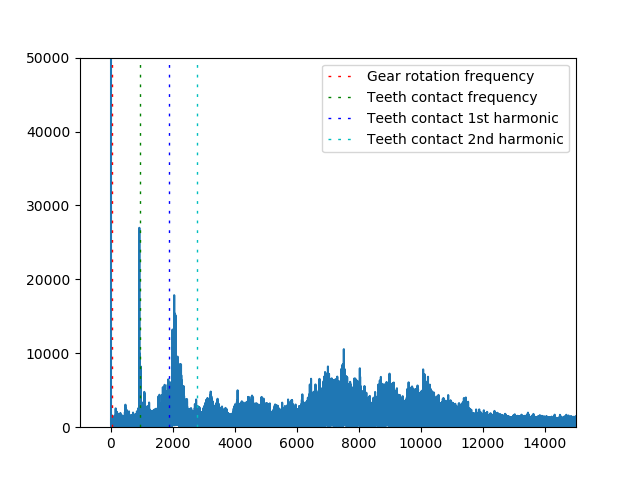

teeth: 32
sample_rate: 97656
gear_hz: [ 29.34860371]
teeth_hz: [ 939.15531886]


<IPython.core.display.Javascript object>


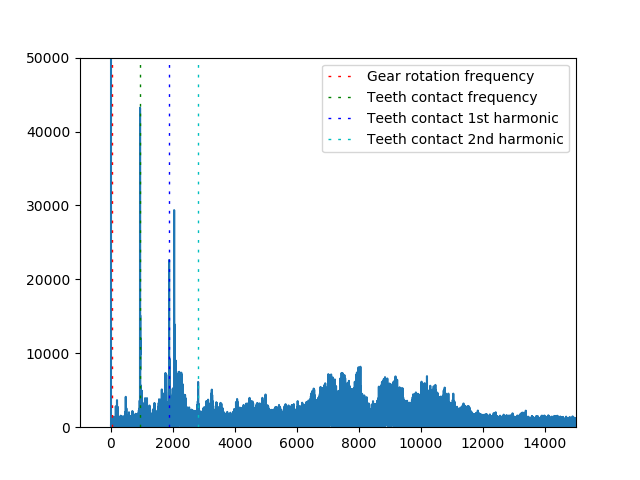

In [5]:
show_file("hs_gear_2_3_good/case2_1.mat")
show_file("hs_gear_2_3_good/case2_2.mat")
show_file("hs_gear_2_3_good/case2_3.mat")


Muestras de turbina 3:

teeth: 32
sample_rate: 97656
gear_hz: [ 29.30107008]
teeth_hz: [ 937.63424242]


<IPython.core.display.Javascript object>


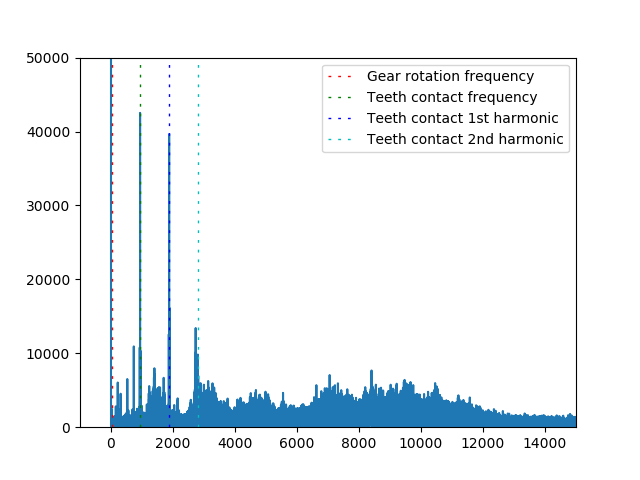

teeth: 32
sample_rate: 97656
gear_hz: [ 29.21762072]
teeth_hz: [ 934.96386319]


<IPython.core.display.Javascript object>


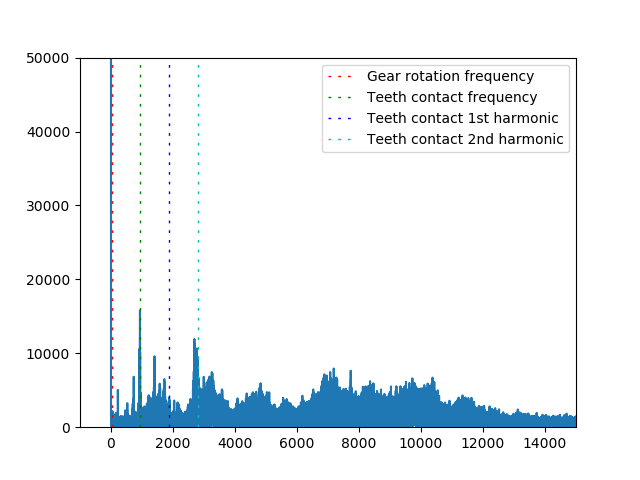

teeth: 32
sample_rate: 97656
gear_hz: [ 29.1062674]
teeth_hz: [ 931.40055672]


<IPython.core.display.Javascript object>


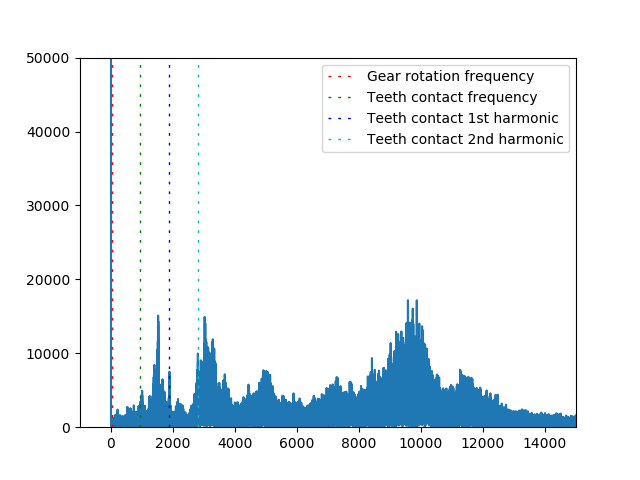

In [6]:
show_file("hs_gear_2_3_good/case3_1.mat")
show_file("hs_gear_2_3_good/case3_2.mat")
show_file("hs_gear_2_3_good/case3_3.mat")